# 실무예제 4-3

## 다음은 2014년도 서울시 광진구의 시간대별 대기오염 측정 결과의 일부이다. SO2, NO2, CO, O3, PM10에 측정치 대상으로 웨이블릿 변환하여 데이터를 축소시키시오.
### 데이터 파일 : ch4-3(대기오염도측정).csv
### 원본 투플수 : 7,648개

In [4]:
# ch4-3.py
import pandas as pd
import numpy as np
import pywt  # Discrete Wavelete Transform을 위한 패키지

# 데이터로드 (ch4-3(대기오염측정).csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('jupyter/ch4-3(대기오염도측정).csv', encoding='CP949', engine='python')

In [5]:
rawData

,년,월,일,시,SO2,NO2,CO,O3,PM10
0,2014,1,1,1,0.010,0.037,1.0,0.005,179
1,2014,1,1,2,0.009,0.037,1.0,0.005,179
2,2014,1,1,3,0.008,0.037,1.1,0.004,181
3,2014,1,1,4,0.006,0.038,1.2,0.004,167
4,2014,1,1,5,0.006,0.039,1.2,0.004,149
...,...,...,...,...,...,...,...,...,...
7643,2014,12,31,19,0.006,0.016,0.4,0.026,46
7644,2014,12,31,20,0.006,0.013,0.3,0.024,40
7645,2014,12,31,22,0.007,0.010,0.3,0.021,41
7646,2014,12,31,23,0.007,0.010,0.2,0.021,37


In [6]:
# 대기오염 측정치(SO2, NO2, CO, O3, PM10)를 대상으로 multi-level 웨이블릿변환함수 wavedec() 적용

# rawData를 1차원 배열(array)로 변환
wavelete_src = []
wavelete_src.extend(rawData.loc[:,'SO2'])
wavelete_src.extend(rawData.loc[:,'NO2'])
wavelete_src.extend(rawData.loc[:,'CO'])
wavelete_src.extend(rawData.loc[:,'O3'])
wavelete_src.extend(rawData.loc[:,'PM10'])

In [7]:
wavelete_src

[0.01,
 0.009000000000000001,
 0.008,
 0.006,
 0.006,
 0.006,
 0.006999999999999999,
 0.006999999999999999,
 0.006,
 0.008,
 0.006,
 0.006,
 0.006999999999999999,
 0.006999999999999999,
 0.006999999999999999,
 0.006999999999999999,
 0.006999999999999999,
 0.006,
 0.005,
 0.005,
 0.006,
 0.006999999999999999,
 0.008,
 0.009000000000000001,
 0.008,
 0.006999999999999999,
 0.006,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.006,
 0.005,
 0.005,
 0.004,
 0.004,
 0.004,
 0.004,
 0.004,
 0.004,
 0.005,
 0.006,
 0.006999999999999999,
 0.006999999999999999,
 0.008,
 0.006999999999999999,
 0.006,
 0.005,
 0.004,
 0.004,
 0.005,
 0.004,
 0.005,
 0.004,
 0.005,
 0.006,
 0.006,
 0.006999999999999999,
 0.006999999999999999,
 0.008,
 0.006,
 0.005,
 0.005,
 0.004,
 0.005,
 0.005,
 0.004,
 0.004,
 0.004,
 0.004,
 0.004,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 0.004,
 0.004,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.005,
 0.004,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 

In [8]:
len(wavelete_src)

38240

In [9]:
# pywt.wavedec() : Multi-level 1D Discrete Wavelet Transform을 위한 함수
# mode : 'zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization' 중 periodic 적용
# level : decomposition level을 지정하는 패러미터로서 여기서는 12를 지정
coeffs = pywt.wavedec(wavelete_src, 'db1', mode='periodic', level=12)

### 파이썬에서 소스 데이터의 웨이블릿 변환을 위해서 PyWavelets(pywt) 패키지의 wavedec() 함수를 활용
#### dwt() : 1차원의 1-level 웨이블릿 변환을 위한 함수
#### wavedec() : 다차원의 multi-level 웨이블릿 변환(decomposition)을 위한 함수
### 본 사례에서는 다층 레벨에서 데이터축소 효과를 보여주기 위해서 wavedec()를 이용함.
### wavedec()의 패러미터
#### 첫번째 패러미터(data) :  wavedec()는 1차원 배열(리스트)가 변환대상이 되기 때문에 5개의 속성을 가진 원 소스(rawData) 데이터를 선형의 1차원 배열로 변환하여(wavelete_src) 제공
#### 두번째 패러미터(wavelet) : wavelet object or string
#### 세번째 패러미터(mode) :  웨이블릿 변환을 위해 소스 데이터를 입력 포맷에 맞게 채우는 방법에 관한 문제로 symmetric(기본값) 등 총 6개 중 하나를 선택할 수 있는데 여기서는 periodic을 선택
#### 네번째 패러미터(level) : 분해(decomposition) 레벨. 분해(decomposition)할 수 있는 최대 레벨은 dwt_max_level() 함수를 이용하여 구할 수 있음. 본 사례는 최대 레벨을 15까지 설정할 수 있는데 여기서는 12로 설정 
### wavedec() 함수의 결과 : 웨이블릿 계수(coefficient) 배열의 ordered list 형태로 구해짐
#### 첫번째 요소 : 근접계수(approximation coefficient)
#### 두번째 요소 : 상세계수(details coefficient). 최고 레벨의 상세계수배열부터 1-레벨이 상세계수배열 순서로 저장됨

In [10]:
coeffs

[array([3.09796875e-01, 5.25796875e-01, 1.75246875e+00, 1.24270781e+01,
        3.63875000e+01, 1.97020000e+01, 2.25879688e+00, 2.16987223e+03,
        2.94570313e+03, 9.71904875e+02]),
 array([ 1.08906250e-02, -2.95890625e-01,  2.56406250e-01, -1.09967344e+01,
        -1.65625000e-01,  1.03323750e+01,  9.10937500e-03, -1.89281527e+03,
         7.27609375e+02,  9.71584188e+02]),
 array([-2.24506403e-02,  8.50737846e-03, -4.92765038e-03, -3.84621895e-01,
        -7.84888527e-02,  1.43056541e-01, -1.39056968e-01, -1.27817948e+01,
         3.36096692e+00, -1.75229899e+00, -4.56304845e+00,  5.79456330e+00,
        -3.23081508e-01,  2.02232539e-01, -1.94825574e+02, -6.03162084e+02,
         6.28441152e+01,  1.76975569e+02,  5.94463566e+02]),
 array([ 2.97187500e-02, -7.03125000e-03,  1.32812500e-02,  3.97500000e-02,
         1.71875000e-03,  3.37500000e-03, -1.53750000e-02, -4.64750000e-01,
        -1.24875000e-01, -3.10625000e-02, -1.59375000e-02,  6.37500000e-03,
        -2.02812500e-02, 

In [11]:
# coeffs 리스트의 크기 구하기
coeffs_len = len(coeffs)

In [12]:
coeffs_len

13

In [13]:
# Approximation coefficient 출력 (level=12)
print("Approximation coefficient : ")
print(coeffs[0])

# Detail coefficient 출력 (level 12부터 1까지)
for i in range(1, coeffs_len):
    print("Detail coefficient (level = " + str(coeffs_len-i) + ")")
    print(coeffs[i])

Approximation coefficient : 
[3.09796875e-01 5.25796875e-01 1.75246875e+00 1.24270781e+01
 3.63875000e+01 1.97020000e+01 2.25879688e+00 2.16987223e+03
 2.94570313e+03 9.71904875e+02]
Detail coefficient (level = 12)
[ 1.08906250e-02 -2.95890625e-01  2.56406250e-01 -1.09967344e+01
 -1.65625000e-01  1.03323750e+01  9.10937500e-03 -1.89281527e+03
  7.27609375e+02  9.71584188e+02]
Detail coefficient (level = 11)
[-2.24506403e-02  8.50737846e-03 -4.92765038e-03 -3.84621895e-01
 -7.84888527e-02  1.43056541e-01 -1.39056968e-01 -1.27817948e+01
  3.36096692e+00 -1.75229899e+00 -4.56304845e+00  5.79456330e+00
 -3.23081508e-01  2.02232539e-01 -1.94825574e+02 -6.03162084e+02
  6.28441152e+01  1.76975569e+02  5.94463566e+02]
Detail coefficient (level = 10)
[ 2.97187500e-02 -7.03125000e-03  1.32812500e-02  3.97500000e-02
  1.71875000e-03  3.37500000e-03 -1.53750000e-02 -4.64750000e-01
 -1.24875000e-01 -3.10625000e-02 -1.59375000e-02  6.37500000e-03
 -2.02812500e-02 -6.30000000e-02 -1.43368750e+00  4.

Source data graph : 


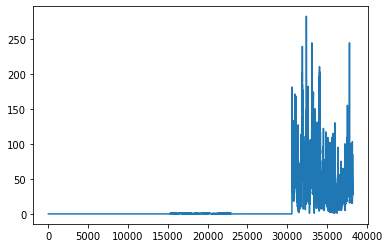

Approximation coefficient graph : 


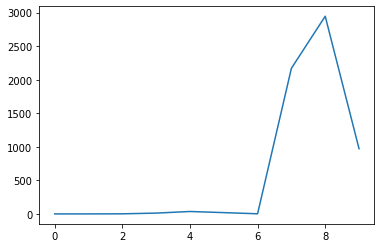

Detail coefficient graph(level = 12)


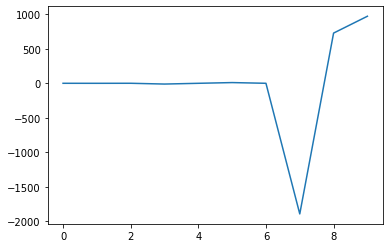

Detail coefficient graph(level = 11)


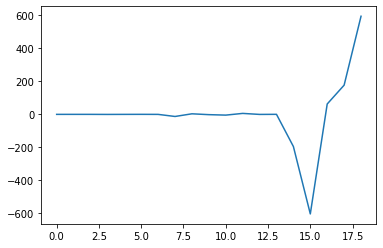

Detail coefficient graph(level = 10)


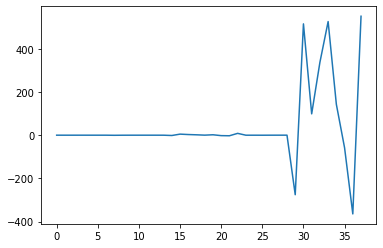

Detail coefficient graph(level = 9)


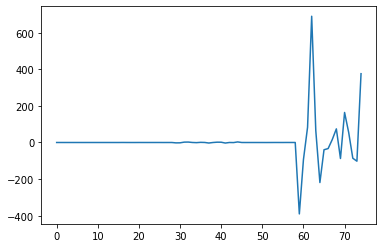

Detail coefficient graph(level = 8)


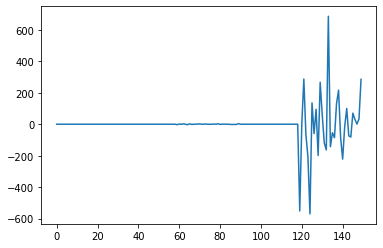

Detail coefficient graph(level = 7)


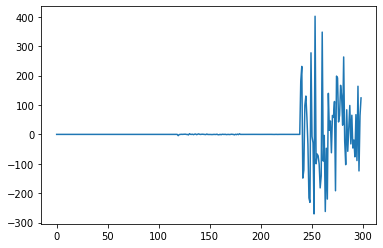

Detail coefficient graph(level = 6)


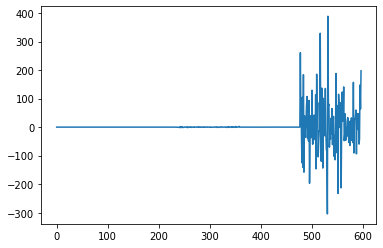

Detail coefficient graph(level = 5)


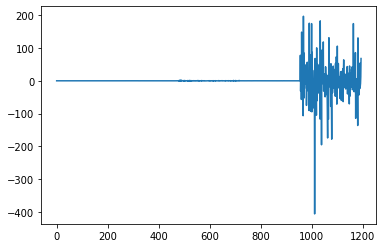

Detail coefficient graph(level = 4)


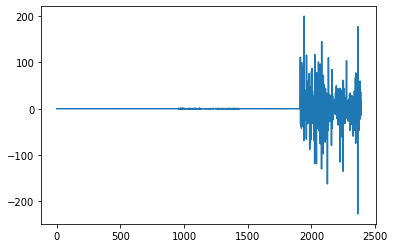

Detail coefficient graph(level = 3)


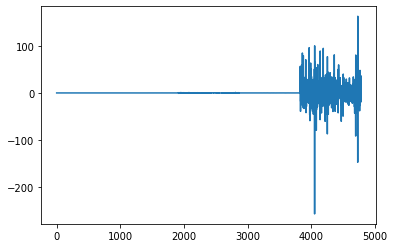

Detail coefficient graph(level = 2)


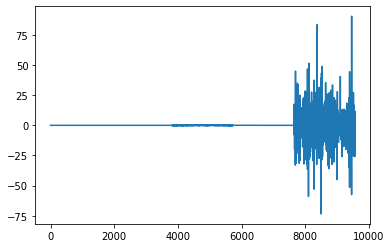

Detail coefficient graph(level = 1)


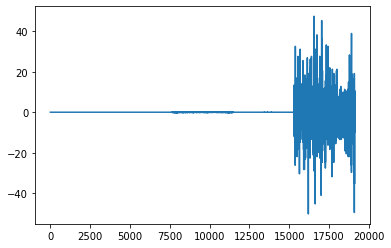

In [14]:
# coefficient 시각화
import matplotlib.pyplot as plt

# 원 소스 그래프
print("Source data graph : ")
plt.plot(wavelete_src)
plt.show()  # 차트 보여주기

# Approximation coefficient 시각화 (level=12)
print("Approximation coefficient graph : ")
plt.plot(coeffs[0])
plt.show()

# Detail coefficient 출력 (level 12부터 1까지)
for i in range(1, coeffs_len):
    print("Detail coefficient graph(level = " + str(coeffs_len-i) + ")")
    plt.plot(coeffs[i])
    plt.show()

### Source data graph 가로축의 값은 원본 데이터를 의미함. 총 (원본 투플수) x (속성수) = 7,648개 x 5개 = 38,240개로 1차원 벡터로 표현되었다. 
### 근접계수배열은 12레벨에 대한 값이며 총 10개의 요소로 구성된다. 이것은 최고레벨인 12레벨에서는 데이터가 38,240개 데이터가 10개까지 축소가 될 수 있음을 의미함
### 그래프에서 보듯이, 레벨이 올라갈 때마다 데이터가 점점 더 희소해지며 데이터 축소의 효과가 나타남을 알 수 있음